# Principal Component Analysis with Cancer Data

In [80]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
# loading dataset into a dataframe
df_bc = pd.read_csv('breast-cancer-wisconsin-data.csv')
df_bc.head(10)  # top 10 rows

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [15]:
# Column data types for the data set
df_bc.info()

# Shape of the dataset
df_bc.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


(699, 11)

In [16]:
df_bc.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
# from the above, we can see one column Bare Nuclei is missing as it is object type. We need to convert it into numerical type

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [24]:
# bare nuclei is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(df_bc['Bare Nuclei'].str.isdigit())  
# if the string is made of digits store True else False  in the bare nuclei column 

temp[temp['Bare Nuclei'] == False]   # from temp take only those rows where bare nuclei has false

 

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [25]:
# On inspecting records number 23, 40 etc, we find "?" in the column in 16 records. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
df_bc = df_bc.replace('?', np.nan)
df_bc = df_bc.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the bare nuclei column from object / string type to float
df_bc['Bare Nuclei'] = df_bc['Bare Nuclei'].astype('float64') 

In [26]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [ ]:
# we can see, the column bare nuclei has been converted into a numeric type

In [27]:
df_bc.isnull().values.any()

False

In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [35]:
# Split the data into separate training (70%) and test (30%) sets and then standardize it to unit variance:

# X = df_bc[df_bc.columns[1:-1]]
# y = df_bc["Class"]

In [32]:
# df_bc[df_bc.columns[1:-1]]
# y.head()

In [58]:
#from sklearn.model_selection import train_test_split

#X_train, X_test_O, y_train, y_test_O = train_test_split(X, y, test_size=0.30, random_state=1)


#print(X_train.shape)
#print(X_test_O.shape)
#print(y_test_O.shape)

In [37]:
# Check for correlation of variable
df_bc.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


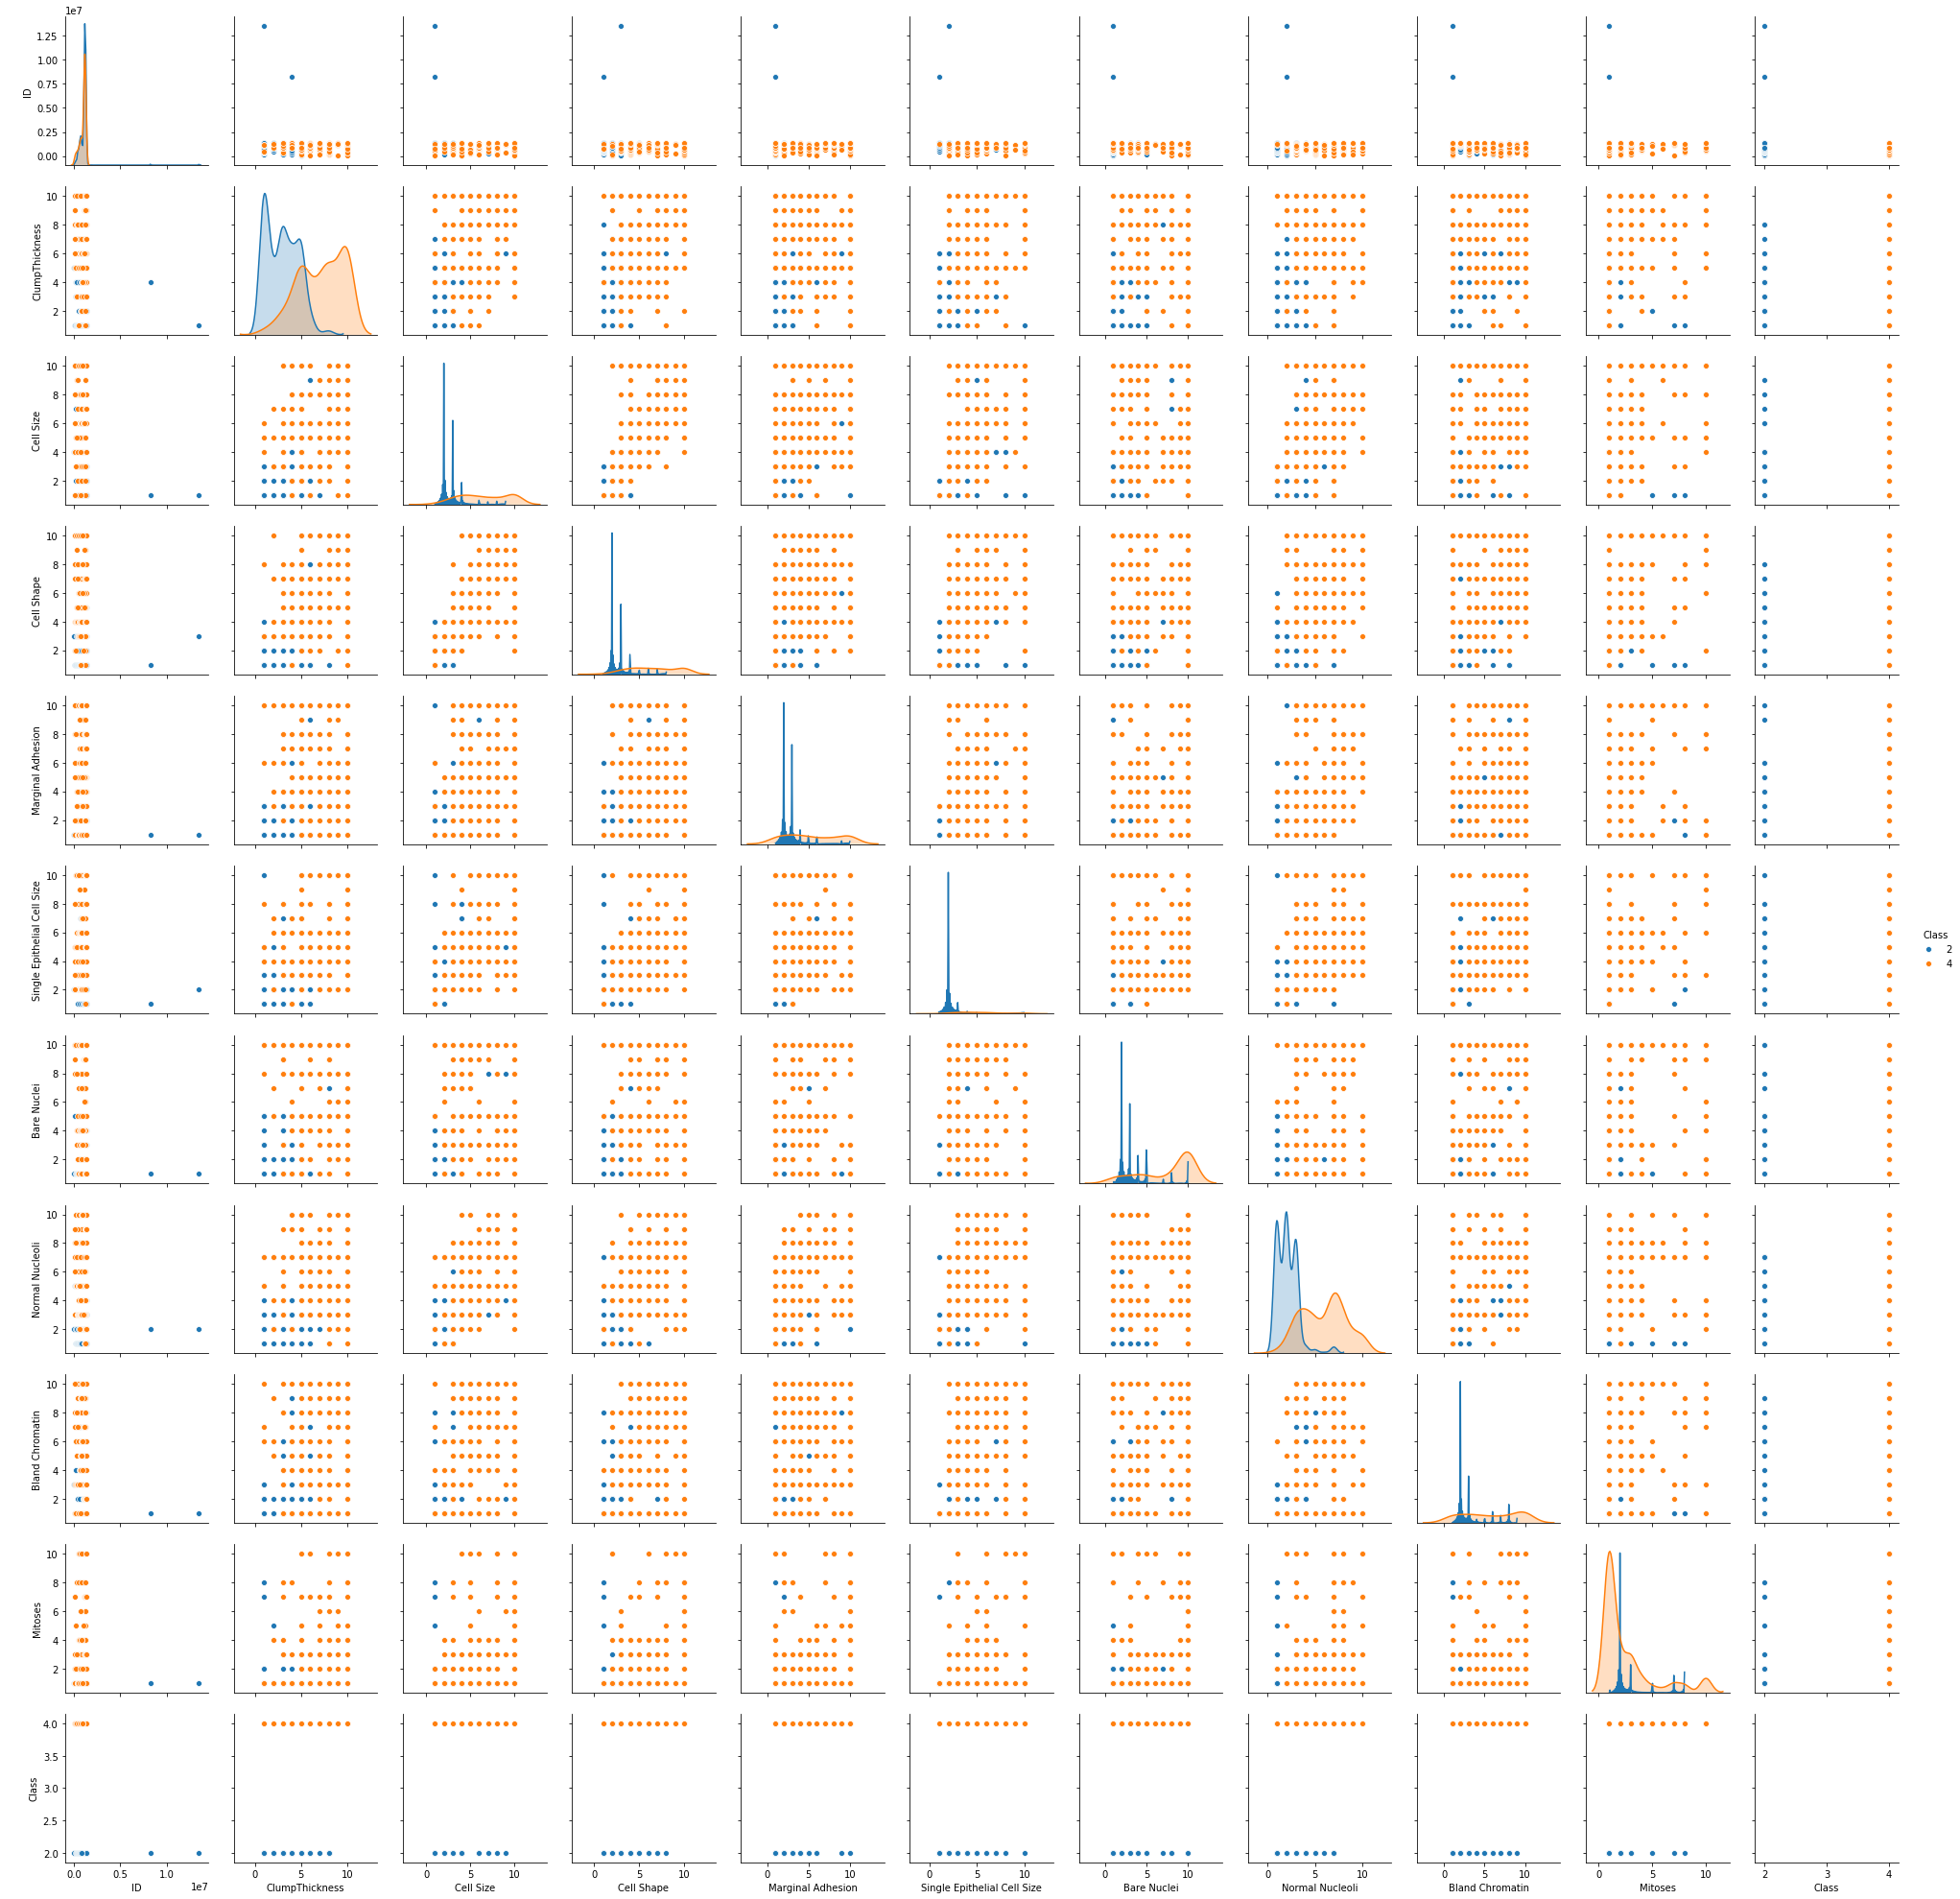

In [39]:
#Let us check for pair plots
sns.pairplot(df_bc, hue = 'Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [46]:
# We will use Z-score function defined in scipy library to detect the outliers
from scipy import stats

z = np.abs(stats.zscore(df_bc))
print(z)

[[0.11623873 0.20693572 0.69999505 ... 0.61182504 0.34391178 0.72539705]
 [0.1115035  0.20693572 0.28384518 ... 0.28411186 0.34391178 0.72539705]
 [0.09126525 0.50386559 0.69999505 ... 0.61182504 0.34391178 0.72539705]
 ...
 [0.29657482 0.20693572 2.25152563 ... 2.33759359 0.23956962 1.37855538]
 [0.28254589 0.14846494 1.59563215 ... 1.02674087 0.34391178 1.37855538]
 [0.28254589 0.14846494 1.59563215 ... 0.37131451 0.34391178 1.37855538]]


In [47]:
# In most of the cases a threshold of 3 or -3 is used i.e 
# if the Z-score value is greater than or less than 3 or -3 respectively, 
# that data point will be identified as outliers.

threshold = 3
print(np.where(z > 3))

(array([ 43,  53,  53,  62,  65,  68,  71,  71,  84,  85,  85,  98,  98,
       100, 104, 104, 105, 113, 117, 122, 129, 149, 149, 163, 167, 173,
       175, 187, 191, 201, 221, 229, 236, 238, 254, 261, 264, 268, 279,
       286, 286, 302, 312, 344, 357, 357, 360, 360, 366, 400, 416, 421,
       425, 482, 482, 506, 529, 608, 612, 648, 648, 662, 680, 689],
      dtype=int64), array([5, 5, 9, 5, 9, 9, 5, 9, 9, 5, 9, 5, 9, 5, 5, 9, 9, 5, 9, 5, 5, 5,
       9, 9, 9, 9, 5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 9, 9, 5, 9, 9, 5, 5,
       5, 9, 5, 9, 9, 9, 5, 5, 5, 5, 9, 9, 0, 5, 9, 5, 9, 0, 9, 9],
      dtype=int64))


In [53]:
## The first array contains the list of row numbers and second array respective column numbers, 
## which mean z[53][5] have a Z-score higher than 3

print(z[53][5])

3.065905839698959


In [55]:
# removing/ treating the outliers
df_bc_o = df_bc[(z < 3).all(axis=1)]

In [57]:
df_bc.shape

(699, 11)

In [56]:
df_bc_o.shape

(646, 11)

In [ ]:
# Now we can see, around 50+ rows have been removed which were treated as outliers

In [0]:
# We could see most of the outliers are now removed.

In [60]:
# Reomving the column ID and Class
X = df_bc_o[df_bc_o.columns[1:-1]]
y = df_bc_o["Class"]

In [63]:
# Split the data into separate training (70%) and test (30%) sets and then standardize it to unit variance:
from sklearn.model_selection import train_test_split

X_train, X_test_O, y_train, y_test_O = train_test_split(X, y, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test_O.shape)
print(y_test_O.shape)

(452, 9)
(194, 9)
(194,)


In [65]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          


# Q6 Create a covariance matrix for identifying Principal components

In [66]:
from sklearn.decomposition import PCA
from scipy.stats import zscore


# PCA
# Step 1 - Create covariance matrix
train_cov_matrix = np.cov(X_train_std.T)  # T stands for Transpose
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[1.00221729 0.64710564 0.65503198 0.50667009 0.52225955 0.55910856
  0.54014992 0.52289292 0.39059328]
 [0.64710564 1.00221729 0.89851062 0.68638864 0.73020802 0.68871131
  0.73033909 0.72584698 0.46481912]
 [0.65503198 0.89851062 1.00221729 0.67092506 0.70116308 0.70210005
  0.72705762 0.71930927 0.42768915]
 [0.50667009 0.68638864 0.67092506 1.00221729 0.55000797 0.69487882
  0.68418869 0.5587877  0.41853026]
 [0.52225955 0.73020802 0.70116308 0.55000797 1.00221729 0.57485375
  0.6162996  0.64248341 0.43817483]
 [0.55910856 0.68871131 0.70210005 0.69487882 0.57485375 1.00221729
  0.6464834  0.5190235  0.42059233]
 [0.54014992 0.73033909 0.72705762 0.68418869 0.6162996  0.6464834
  1.00221729 0.6487006  0.3485511 ]
 [0.52289292 0.72584698 0.71930927 0.5587877  0.64248341 0.5190235
  0.6487006  1.00221729 0.39600693]
 [0.39059328 0.46481912 0.42768915 0.41853026 0.43817483 0.42059233
  0.3485511  0.39600693 1.00221729]]


# Q7 Identify eigen values and eigen vector

In [67]:
# Step 2- Get eigen values and eigen vector

eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)  # coordinates of points on PCA: PC1,PC2,...,PC7 as present on the orig x-y axis with same magnitude
print('\n Eigen Values \n%s', eigenvalues) # magnitude of the spread in the direction of the vectors, here 7 vectors.

Eigen Vectors 
%s [[-3.05775188e-01  3.50839994e-02 -8.04071304e-02 -8.91606457e-01
  -1.32158247e-02 -1.20231680e-01 -2.33964333e-01  1.25601452e-01
  -1.36740331e-01]
 [-3.81564150e-01 -8.28661920e-02 -1.35453302e-01 -3.69968450e-03
  -7.20796676e-01  6.12028744e-02  2.41910467e-01 -4.89499794e-01
   8.80701259e-02]
 [-3.78079377e-01 -1.34903728e-01 -1.11954921e-01 -5.92450157e-02
   6.85924533e-01  4.61428840e-02  3.36419548e-01 -4.60730863e-01
   1.57290882e-01]
 [-3.32748709e-01 -6.19154343e-02  5.39837340e-01  2.15307213e-01
   4.46132612e-02 -2.11586347e-01 -1.90388029e-01 -1.85408729e-01
  -6.55957393e-01]
 [-3.33060165e-01  1.87330179e-02 -3.80071859e-01  2.08025896e-01
   5.75137117e-02  6.95443390e-01 -3.81987521e-01  1.33141604e-01
  -2.24499710e-01]
 [-3.34792093e-01 -2.96403214e-02  5.28319337e-01 -5.54347587e-02
  -5.65719953e-02  3.57350416e-01  4.29654295e-01  4.97380371e-01
   2.04820933e-01]
 [-3.44985223e-01 -2.58850447e-01  1.29192142e-01  1.98414187e-01
   6.25829

# Q8 Find variance and cumulative variance by each eigen vector

In [69]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort() # default corts on the first column, here eigen values

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(5.828787836364808, array([-0.30577519, -0.38156415, -0.37807938, -0.33274871, -0.33306017,
       -0.33479209, -0.34498522, -0.33139141, -0.23536085])), (0.7408366748116038, array([ 0.035084  , -0.08286619, -0.13490373, -0.06191543,  0.01873302,
       -0.02964032, -0.25885045, -0.11013063,  0.94313731])), (0.5855776150320838, array([-0.08040713, -0.1354533 , -0.11195492,  0.53983734, -0.38007186,
        0.52831934,  0.12919214, -0.48038047,  0.0140318 ])), (0.5293886001042288, array([-0.89160646, -0.00369968, -0.05924502,  0.21530721,  0.2080259 ,
       -0.05543476,  0.19841419,  0.23720451,  0.1147829 ])), (0.3807074161213506, array([-0.12023168,  0.06120287,  0.04614288, -0.21158635,  0.69544339,
        0.35735042, -0.27450569, -0.48054187, -0.1314759 ])), (0.30474565074951443, array([-0.23396433,  0.24191047,  0.33641955, -0.19038803, -0.38198752,
        0.4296543 , -0.5611246 ,  0.30150293, -0.03212775])), (0.28197890925955527, array([-0.13674033,  0.08807013,  0.15729088, -

In [74]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

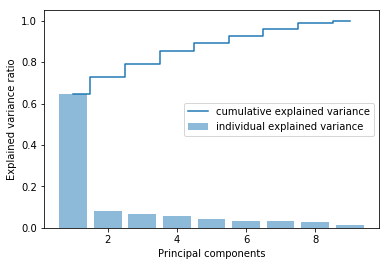

In [81]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# this means the last dimension gives more noise than the signal and hence add very less to the info as seen above graph

In [89]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

In [90]:
Proj_data_df.shape

(452, 8)

In [91]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y_train, test_size=test_size, random_state=seed)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


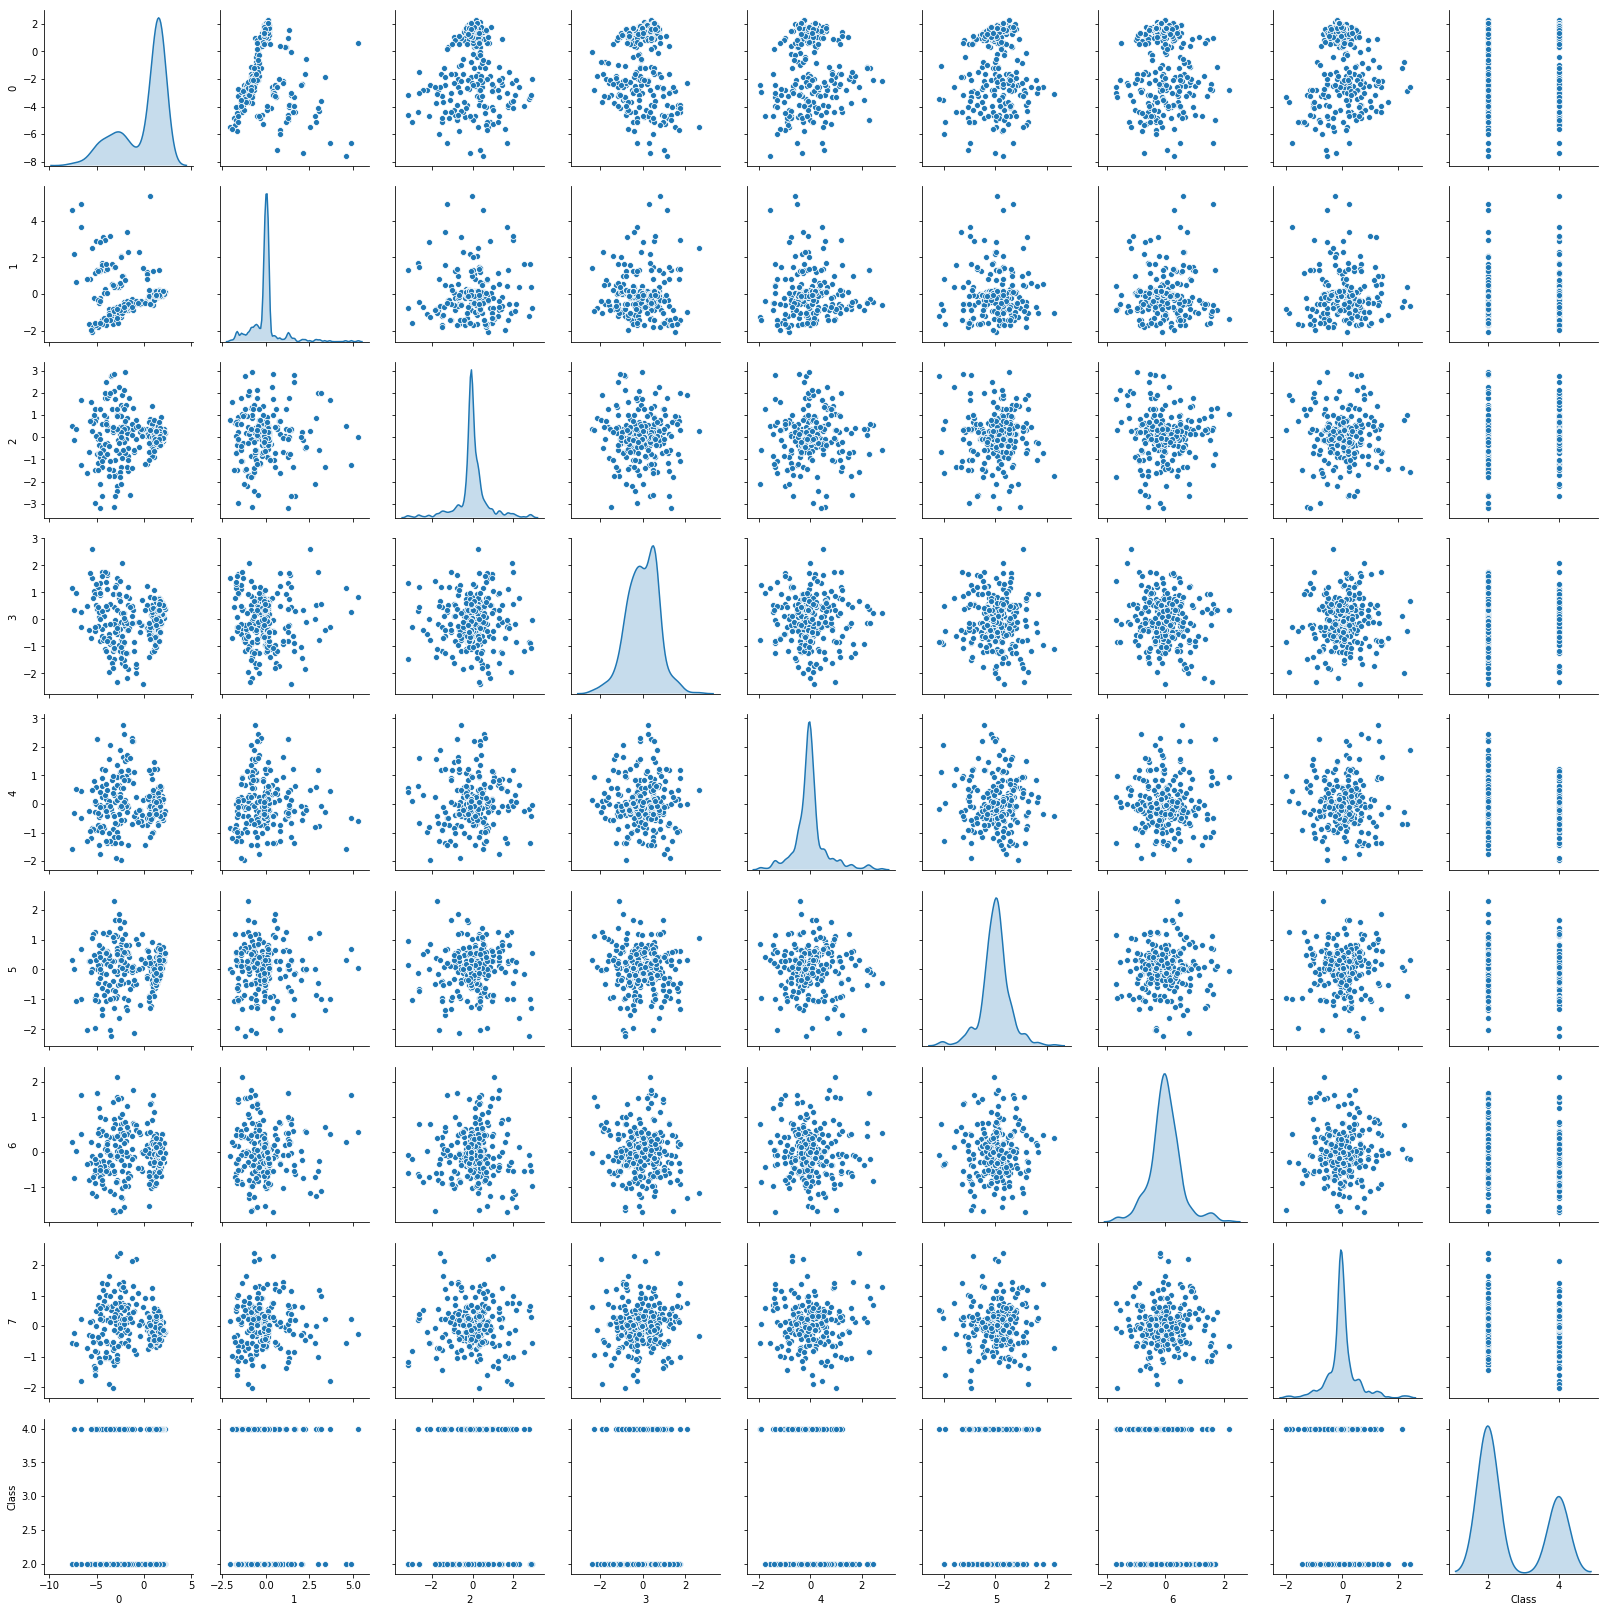

In [92]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

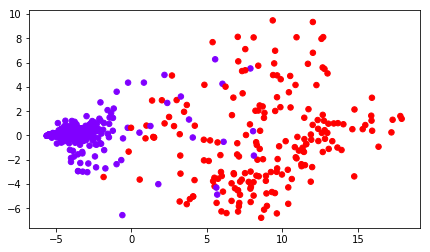

In [121]:
import sklearn.decomposition as dec
X_bis = dec.PCA().fit_transform(X)
plt.figure(figsize=(7,4));
plt.scatter(X_bis[:,0], X_bis[:,1], c=y,
            s=30, cmap=plt.cm.rainbow);

In [126]:
principalDF = pd.DataFrame(data = X_bis, 
                          columns = ['principal comp 1' , 'principal comp 2', 'principal comp 3', 'principal comp 4', 
                                     'principal comp 5','principal comp 6', 'principal comp 7', 'principal comp 8', 
                                    'principal comp '])

In [127]:
X_bis.shape

(646, 9)

# Q10 Find correlation between components and features

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [82]:
jk = pd.read_csv("jokes.csv")  
jk.head() 

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [86]:
# creating a new dataset with first 200 rows and all the columns
ratings = jk.iloc[0:200,:]

In [87]:
ratings.shape

(200, 101)

In [88]:
ratings.head(2)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q21 Change the column indices from 0 to 99

# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [95]:
ratings_a = ratings.replace(99.0, 0) 

In [97]:
ratings_a.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [100]:
# Standardinzing the ratings using StandardScalar
std_scl = StandardScaler()
ratings_diff =  std_scl.fit_transform(ratings_a) 
ratings_diff

array([[ 0.17851402, -1.85701632,  1.67164929, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.37166689,  0.78949409, -0.1802773 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.96874834, -0.11788091, -0.12112987, ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 1.37166689,  0.46479617, -0.89412566, ..., -0.23610604,
         0.18266036, -0.02590486],
       [-1.24409131, -0.11788091, -0.12112987, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.04084254,  1.12308784, -1.60593445, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [108]:
# mean of ratings for each column
ratings_diff.mean(axis=0)

array([ 5.32907052e-17,  0.00000000e+00,  1.77635684e-17, -2.88657986e-17,
       -1.33226763e-17, -2.22044605e-18, -6.66133815e-18,  6.66133815e-18,
        1.66533454e-17, -5.32907052e-17,  8.88178420e-18, -3.55271368e-17,
       -4.44089210e-17, -8.88178420e-18,  3.55271368e-17, -8.88178420e-18,
       -1.19904087e-16,  1.99840144e-17,  2.55351296e-17,  8.88178420e-18,
        2.66453526e-17,  1.11022302e-16, -1.77635684e-17, -2.66453526e-17,
        4.44089210e-17, -1.33226763e-17, -5.32907052e-17, -1.77635684e-17,
        8.88178420e-18,  0.00000000e+00,  0.00000000e+00,  3.55271368e-17,
       -1.06581410e-16,  4.44089210e-18,  4.44089210e-18, -8.88178420e-18,
        1.77635684e-17,  1.77635684e-17, -2.22044605e-17, -1.77635684e-17,
        1.11022302e-17,  0.00000000e+00,  1.33226763e-17,  3.10862447e-17,
       -2.66453526e-17,  8.88178420e-18, -1.33226763e-17, -1.77635684e-17,
        7.77156117e-17, -1.77635684e-17,  7.10542736e-17, -8.88178420e-18,
       -8.88178420e-18, -

In [114]:
ratings_f = ratings_a.transpose()
ratings_f.shape

(101, 200)

In [115]:
ratings_f.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
NumJokes,74.00,100.00,49.0,48.00,91.00,100.00,47.0,100.00,100.00,72.00,...,61.00,71.00,100.00,100.00,100.00,100.00,71.00,100.00,43.0,71.00
Joke1,-7.82,4.08,0.0,0.00,8.50,-6.17,0.0,6.84,-3.79,3.01,...,3.54,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.0,5.58
Joke2,8.79,-0.29,0.0,8.35,4.61,-3.54,0.0,3.16,-3.54,5.15,...,-6.70,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.0,-7.28
Joke3,-9.66,6.36,0.0,0.00,-4.17,0.44,0.0,9.17,-9.42,5.15,...,-4.76,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.0,-4.56
Joke4,-8.16,4.37,0.0,0.00,-5.39,-8.50,0.0,-6.21,-6.89,3.01,...,0.00,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.0,2.67


In [116]:
ratings_m = ratings_diff.mean(axis=0)
ratings_m.shape

(101,)

In [131]:
ratings_mean=pd.DataFrame(ratings_m, columns=['mean jokes']) 

In [140]:
jokes = pd.merge(ratings_f, ratings_mean, on = ratings_f.index)

In [142]:
jokes

,key_0,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,mean jokes
0,NumJokes,74.00,100.00,49.00,48.00,91.00,100.00,47.00,100.00,100.00,...,71.00,100.00,100.00,100.00,100.00,71.00,100.00,43.00,71.00,5.329071e-17
1,Joke1,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,...,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58,0.000000e+00
2,Joke2,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,...,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28,1.776357e-17
3,Joke3,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,...,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56,-2.886580e-17
4,Joke4,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,...,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67,-1.332268e-17
5,Joke5,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,...,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38,-2.220446e-18
6,Joke6,-8.50,-9.66,9.27,8.16,1.60,-4.32,-9.85,-1.70,-0.29,...,4.22,2.14,9.22,-0.05,7.23,4.66,5.05,0.00,2.18,-6.661338e-18
7,Joke7,-9.85,-0.73,9.03,-2.82,7.04,-8.69,7.72,9.27,-5.29,...,-2.38,2.77,9.08,2.18,2.04,-7.09,-3.69,3.64,2.14,6.661338e-18
8,Joke8,4.17,-5.34,9.27,6.21,4.61,-0.87,8.79,1.41,-8.93,...,1.46,0.34,5.78,4.47,-4.27,-7.72,2.18,-1.89,2.23,1.665335e-17
9,Joke9,-8.98,8.88,0.00,0.00,-0.44,-6.65,0.00,-5.19,-7.86,...,-0.39,2.52,-3.40,1.21,3.11,3.69,3.30,0.00,5.58,-5.329071e-17
